In [2]:
!pip install seaborn


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np

In [4]:
combine_data = pd.read_csv("AllCombine")
combine_data.head()

,Unnamed: 0,Player,Pos,School,Ht,Wt,40yd,Vertical,Bench,Broad Jump,3Cone,Shuttle
0,0,Khalid Abdullah,OLB,Mars Hill,6-2,227.0,4.61,36.5,26.0,126.0,7.13,4.25
1,1,Anthony Adams,DT,Penn State,6-0,299.0,5.13,30.5,0.0,109.0,7.68,4.59
2,2,Sam Aiken,WR,North Carolina,6-2,209.0,4.59,39.5,0.0,121.0,7.22,0.00
3,3,Paul Arnold,WR,Washington,6-1,213.0,4.53,40.5,0.0,131.0,6.84,4.11
4,4,B.J. Askew,RB,Michigan,6-2,241.0,4.60,0.0,0.0,0.0,0.00,0.00


In [5]:
zero_count = combine_data['40yd'].value_counts().get(0, 0)

print(f"Number of NaN values in the '40yd' column: {zero_count}")

Number of NaN values in the '40yd' column: 474


7680


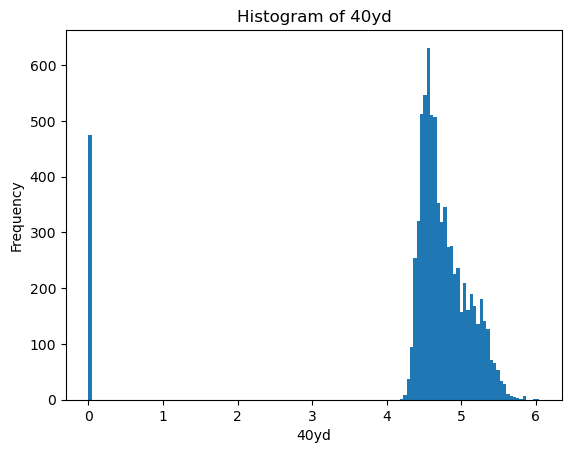

In [6]:
# Assuming 'combine_pos' is your DataFrame
combine_pos_flat = combine_data['40yd'].apply(lambda x: np.nan if isinstance(x, (list, tuple)) else x)

# Drop NaN values (if needed)
print(combine_pos_flat.count())

# Plot the histogram
plt.hist(combine_pos_flat, bins='auto')
plt.xlabel('40yd')
plt.ylabel('Frequency')
plt.title('Histogram of 40yd')
plt.show()

In [7]:
summary_stats_single = combine_data.describe().rename(index={'mean': 'Mean', '50%': 'Median', 'std': 'Std', '50%': 'Median'})
print(summary_stats_single)

         Unnamed: 0           Wt         40yd     Vertical        Bench  \
count   7680.000000  7680.000000  7680.000000  7680.000000  7680.000000   
Mean    3839.500000   241.990104     4.481572    25.407656    13.769661   
Std     2217.169367    47.171999     1.186797    14.281995    11.099401   
min        0.000000     0.000000     0.000000     0.000000     0.000000   
25%     1919.750000   205.000000     4.510000    24.500000     0.000000   
Median  3839.500000   232.000000     4.670000    31.500000    16.000000   
75%     5759.250000   280.000000     4.950000    35.000000    23.000000   
max     7679.000000   384.000000     6.050000    46.500000    49.000000   

         Broad Jump        3Cone      Shuttle  
count   7680.000000  7680.000000  7680.000000  
Mean      87.424609     4.545194     2.804036  
Std       49.421477     3.544137     2.125903  
min        0.000000     0.000000     0.000000  
25%       93.000000     0.000000     0.000000  
Median   112.000000     6.940000    

In [8]:
summary_stats_single.head()

,Unnamed: 0,Wt,40yd,Vertical,Bench,Broad Jump,3Cone,Shuttle
count,7680.000000,7680.000000,7680.000000,7680.000000,7680.000000,7680.000000,7680.000000,7680.000000
Mean,3839.500000,241.990104,4.481572,25.407656,13.769661,87.424609,4.545194,2.804036
Std,2217.169367,47.171999,1.186797,14.281995,11.099401,49.421477,3.544137,2.125903
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1919.750000,205.000000,4.510000,24.500000,0.000000,93.000000,0.000000,0.000000


In [9]:
desired_positions = ['QB', 'WR', 'TE', 'RB', 'K']
combine_pos_filtered = combine_data[combine_data['Pos'].isin(desired_positions)]

print(combine_pos_filtered)

      Unnamed: 0            Player Pos           School    Ht     Wt  40yd  \
2              2         Sam Aiken  WR   North Carolina   6-2  209.0  4.59   
3              3       Paul Arnold  WR       Washington   6-1  213.0  4.53   
4              4        B.J. Askew  RB         Michigan   6-2  241.0  4.60   
9              9        Brad Banks  QB             Iowa  5-11  201.0  4.67   
14            14      Arnaz Battle  WR       Notre Dame   6-1  217.0  4.58   
...          ...               ...  ..              ...   ...    ...   ...   
7674        7674     Renaldo Works  RB         Oklahoma   6-0  222.0  4.70   
7675        7675     Carlos Wright  WR  Tennessee State   6-1  203.0  4.65   
7676        7676      Jason Wright  RB     Northwestern  5-10  210.0  4.68   
7678        7678     Kirk Yliniemi   K     Oregon State   6-0  214.0  4.69   
7679        7679  Kevin Youngblood  WR          Clemson   6-4  213.0  4.64   

      Vertical  Bench  Broad Jump  3Cone  Shuttle  
2         3

In [10]:
combine_pos_filtered.count()

Unnamed: 0    2685
Player        2685
Pos           2685
School        2685
Ht            2685
Wt            2685
40yd          2685
Vertical      2685
Bench         2685
Broad Jump    2685
3Cone         2685
Shuttle       2685
dtype: int64

In [11]:
combine_pos = combine_pos_filtered.groupby(['Pos'])
combine_pos.count()

,Unnamed: 0,Player,School,Ht,Wt,40yd,Vertical,Bench,Broad Jump,3Cone,Shuttle
Pos,,,,,,,,,,,
K,104,104,104,104,104,104,104,104,104,104,104
QB,417,417,417,417,417,417,417,417,417,417,417
RB,673,673,673,673,673,673,673,673,673,673,673
TE,428,428,428,428,428,428,428,428,428,428,428
WR,1063,1063,1063,1063,1063,1063,1063,1063,1063,1063,1063


c:\Users\mjeow\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\mjeow\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\mjeow\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


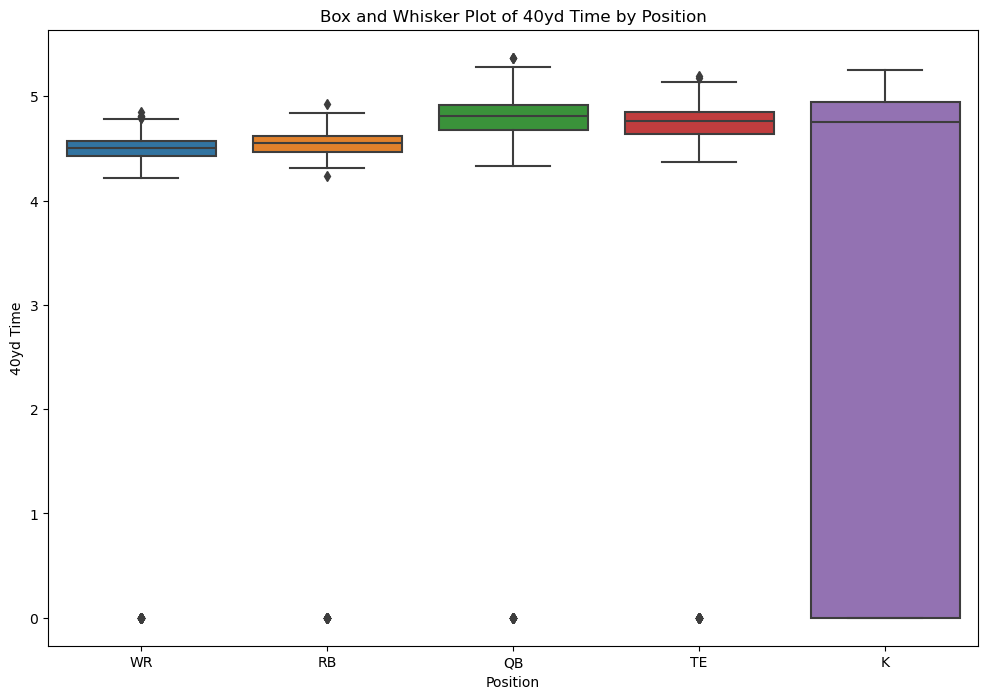

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'combine_data' is your original DataFrame
desired_positions = ['QB', 'WR', 'TE', 'RB', 'K']
filtered_data = combine_data[combine_data['Pos'].isin(desired_positions)]

plt.figure(figsize=(12, 8))
sns.boxplot(x='Pos', y='40yd', data=filtered_data)
plt.xlabel('Position')
plt.ylabel('40yd Time')
plt.title('Box and Whisker Plot of 40yd Time by Position')
plt.show()


c:\Users\mjeow\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\mjeow\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\mjeow\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


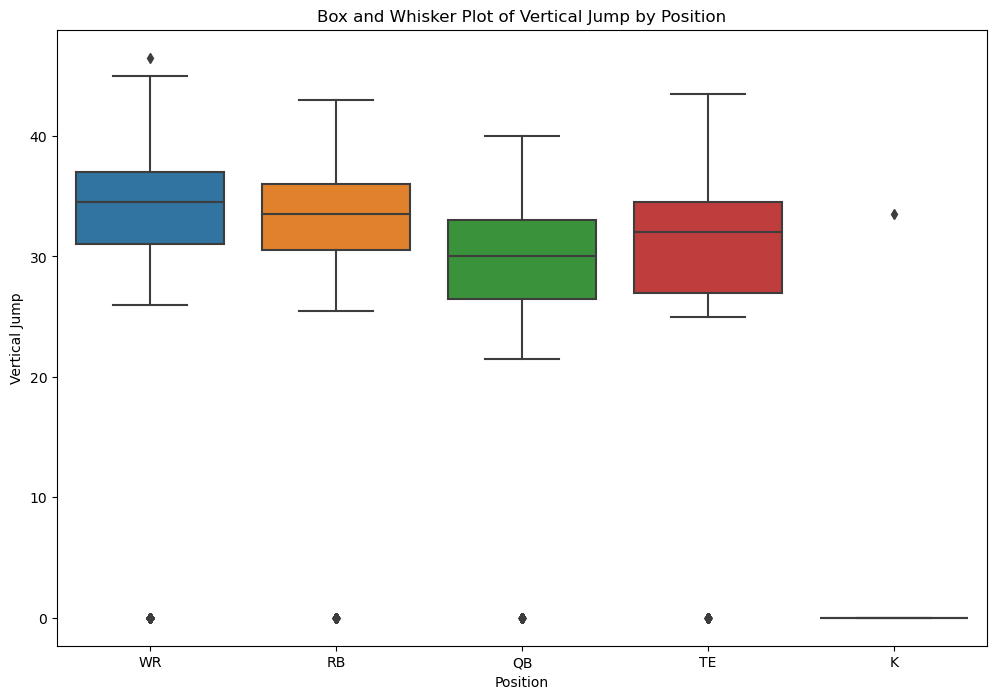

In [37]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='Pos', y='Vertical', data=filtered_data)
plt.xlabel('Position')
plt.ylabel('Vertical Jump')
plt.title('Box and Whisker Plot of Vertical Jump by Position')
plt.show()

c:\Users\mjeow\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\mjeow\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\mjeow\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\mjeow\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

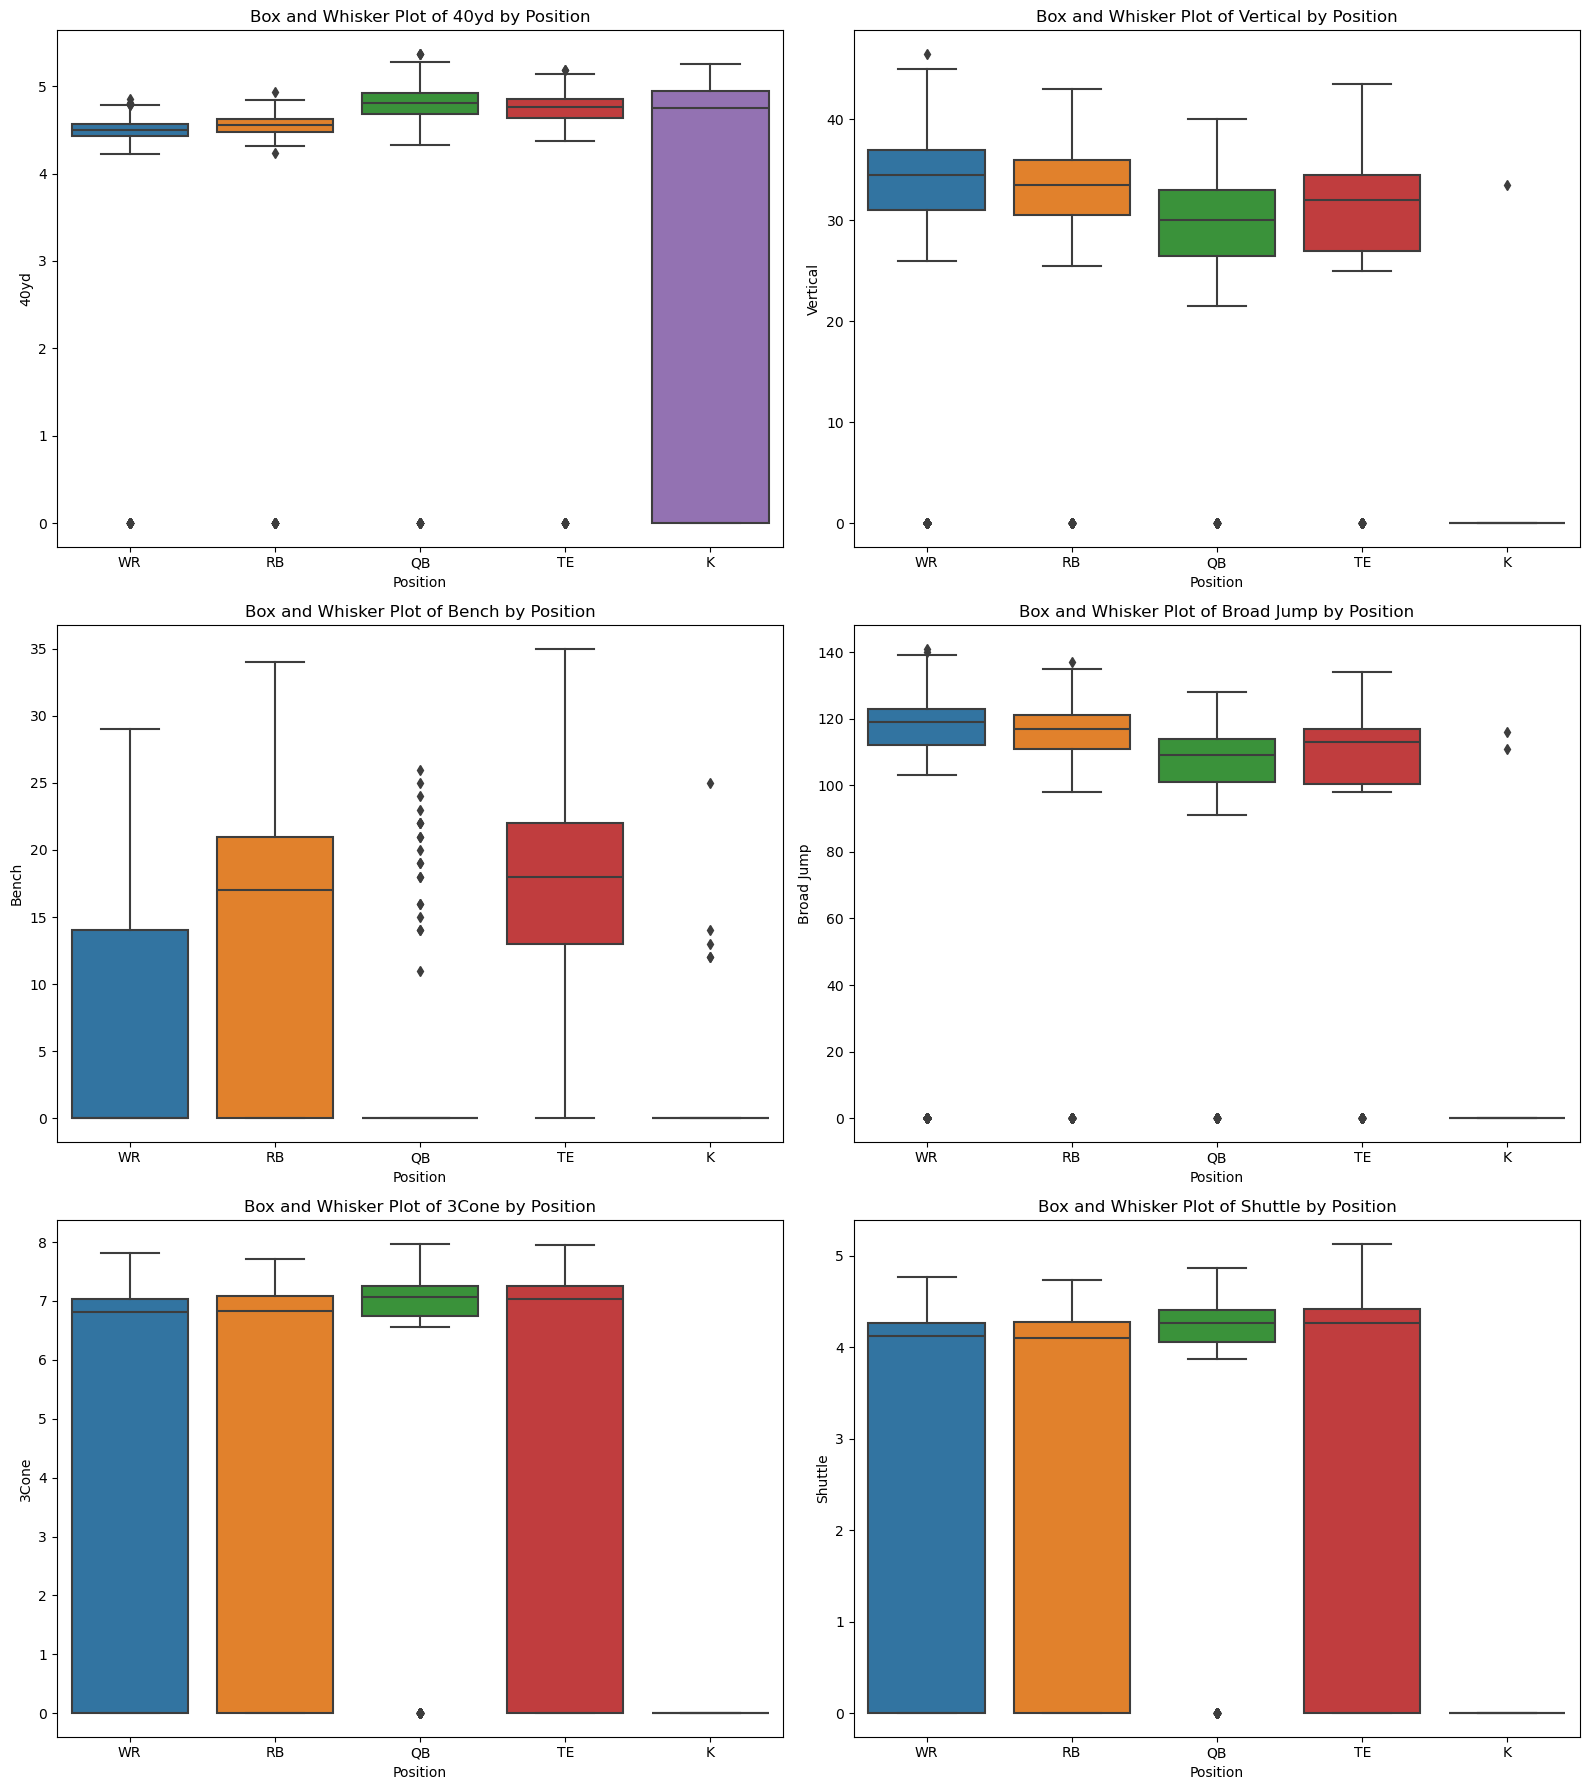

In [41]:
desired_positions = ['QB', 'WR', 'TE', 'RB', 'K']
filtered_data = combine_data[combine_data['Pos'].isin(desired_positions)]

# Define the columns you want to plot
columns_to_plot = ['40yd', 'Vertical', 'Bench', 'Broad Jump', '3Cone', 'Shuttle']

# Create subplots to display multiple boxplots
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(16, 18))

# Flatten the axes for easier iteration
axes = axes.flatten()

# Plot boxplots for each column
for i, column in enumerate(columns_to_plot):
    sns.boxplot(x='Pos', y=column, data=filtered_data, ax=axes[i])
    axes[i].set_xlabel('Position')
    axes[i].set_ylabel(column)
    axes[i].set_title(f'Box and Whisker Plot of {column} by Position')

# Adjust layout
plt.tight_layout()
plt.show()

In [13]:
combine_data.count()

Unnamed: 0    7680
Player        7680
Pos           7680
School        7680
Ht            7680
Wt            7680
40yd          7680
Vertical      7680
Bench         7680
Broad Jump    7680
3Cone         7680
Shuttle       7680
dtype: int64

2685


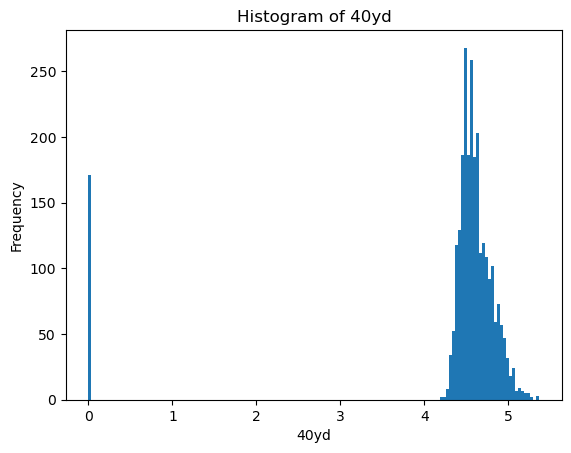

In [14]:

# Assuming 'combine_pos' is your DataFrame
combine_pos_flat = combine_pos['40yd'].apply(lambda x: np.nan if isinstance(x, (list, tuple)) else x)

# Drop NaN values (if needed)
print(combine_pos_flat.count())

# Plot the histogram
plt.hist(combine_pos_flat, bins='auto')
plt.xlabel('40yd')
plt.ylabel('Frequency')
plt.title('Histogram of 40yd')
plt.show()

In [15]:
combine_pos_filtered['40yd'] = combine_pos_filtered['40yd'].replace(0.0, pd.NA)
combine_pos_filtered['40yd'] = pd.to_numeric(combine_pos_filtered['40yd'], errors='coerce')
combine_pos_filtered = combine_pos_filtered.dropna(subset=['40yd'])

C:\Users\mjeow\AppData\Local\Temp\ipykernel_30208\1333347371.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combine_pos_filtered['40yd'] = combine_pos_filtered['40yd'].replace(0.0, pd.NA)
C:\Users\mjeow\AppData\Local\Temp\ipykernel_30208\1333347371.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combine_pos_filtered['40yd'] = pd.to_numeric(combine_pos_filtered['40yd'], errors='coerce')


In [16]:
combine_pos_filtered.count()

Unnamed: 0    2514
Player        2514
Pos           2514
School        2514
Ht            2514
Wt            2514
40yd          2514
Vertical      2514
Bench         2514
Broad Jump    2514
3Cone         2514
Shuttle       2514
dtype: int64

In [17]:
print(st.normaltest(combine_pos_filtered['40yd']))

NormaltestResult(statistic=223.05953681159133, pvalue=3.657943670686471e-49)


(array([ 46., 330., 743., 579., 366., 234., 144.,  47.,  19.,   6.]),
 array([4.22 , 4.335, 4.45 , 4.565, 4.68 , 4.795, 4.91 , 5.025, 5.14 ,
        5.255, 5.37 ]),
 <BarContainer object of 10 artists>)

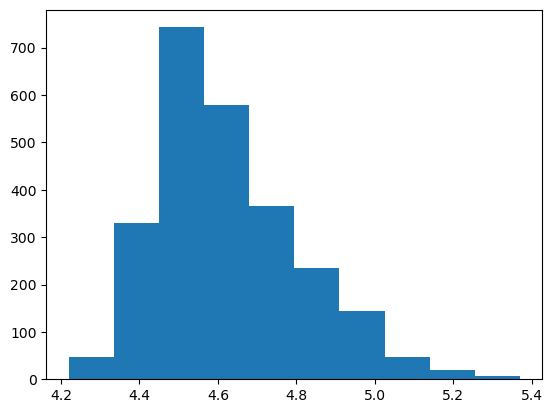

In [18]:
plt.hist(combine_pos_filtered['40yd'])

In [19]:
combine_pos = combine_pos_filtered.groupby(['Pos'])

combine_pos_40yd_mean = combine_pos['40yd'].mean()
combine_pos_40yd_median = combine_pos['40yd'].median()
combine_pos_40yd_var = combine_pos['40yd'].var()
combine_pos_40yd_std = combine_pos['40yd'].std()
combine_pos_40yd_sem = combine_pos['40yd'].sem()

In [20]:
combine_pos.count()

,Unnamed: 0,Player,School,Ht,Wt,40yd,Vertical,Bench,Broad Jump,3Cone,Shuttle
Pos,,,,,,,,,,,
K,61,61,61,61,61,61,61,61,61,61,61
QB,393,393,393,393,393,393,393,393,393,393,393
RB,648,648,648,648,648,648,648,648,648,648,648
TE,396,396,396,396,396,396,396,396,396,396,396
WR,1016,1016,1016,1016,1016,1016,1016,1016,1016,1016,1016


In [21]:
summary_40yd = pd.DataFrame({
    'Mean': combine_pos_40yd_mean,
    'Median': combine_pos_40yd_median,
    'Var': combine_pos_40yd_var,
    'Std': combine_pos_40yd_std,
    'Sem': combine_pos_40yd_sem})

summary_40yd

,Mean,Median,Var,Std,Sem
Pos,,,,,
K,4.910984,4.920,0.022479,0.149930,0.019197
QB,4.822443,4.820,0.030396,0.174345,0.008795
RB,4.555108,4.560,0.011772,0.108500,0.004262
TE,4.769167,4.775,0.020625,0.143614,0.007217
WR,4.511437,4.510,0.010403,0.101997,0.003200


In [22]:
combine_pos_filtered['Vertical'] = combine_pos_filtered['Vertical'].replace(0.0, pd.NA)
combine_pos_filtered['Vertical'] = pd.to_numeric(combine_pos_filtered['Vertical'], errors='coerce')
combine_pos_clean = combine_pos_filtered.dropna(subset=['Vertical'])

In [23]:
combine_pos_clean.count()

Unnamed: 0    2067
Player        2067
Pos           2067
School        2067
Ht            2067
Wt            2067
40yd          2067
Vertical      2067
Bench         2067
Broad Jump    2067
3Cone         2067
Shuttle       2067
dtype: int64

In [24]:
combine_pos_vertical_mean = combine_pos['Vertical'].mean()
combine_pos_vertical_median = combine_pos['Vertical'].median()
combine_pos_vertical_var = combine_pos['Vertical'].var()
combine_pos_vertical_std = combine_pos['Vertical'].std()
combine_pos_vertical_sem = combine_pos['Vertical'].sem()

In [25]:
summary_vertical = pd.DataFrame({
    'Mean': combine_pos_vertical_mean,
    'Median': combine_pos_vertical_median,
    'Var': combine_pos_vertical_var,
    'Std': combine_pos_vertical_std,
    'Sem': combine_pos_vertical_sem})

summary_vertical

,Mean,Median,Var,Std,Sem
Pos,,,,,
K,33.500000,33.5,NaN,NaN,NaN
QB,31.185075,31.0,9.992591,3.161106,0.172710
RB,34.362976,34.0,9.181645,3.030123,0.129088
TE,33.003106,33.0,10.693137,3.270036,0.182232
WR,35.326340,35.5,9.892794,3.145281,0.107378


In [26]:
combine_pos_filtered['Bench'] = combine_pos_filtered['Bench'].replace(0.0, pd.NA)
combine_pos_filtered['Bench'] = pd.to_numeric(combine_pos_filtered['Bench'], errors='coerce')
combine_pos_filtered = combine_pos_filtered.dropna(subset=['Bench'])

In [27]:
combine_pos_bench_mean = combine_pos['Bench'].mean()
combine_pos_bench_median = combine_pos['Bench'].median()
combine_pos_bench_var = combine_pos['Bench'].var()
combine_pos_bench_std = combine_pos['Bench'].std()
combine_pos_bench_sem = combine_pos['Bench'].sem()

In [28]:
summary_bench = pd.DataFrame({
    'Mean': combine_pos_bench_mean,
    'Median': combine_pos_bench_median,
    'Var': combine_pos_bench_var,
    'Std': combine_pos_bench_std,
    'Sem': combine_pos_bench_sem})

summary_bench

,Mean,Median,Var,Std,Sem
Pos,,,,,
K,17.333333,14.0,44.333333,6.658328,3.844188
QB,19.300000,19.5,16.326316,4.040584,0.903502
RB,19.334711,19.0,21.051298,4.588169,0.208553
TE,20.160883,20.0,19.401250,4.404685,0.247392
WR,14.571138,14.0,17.092689,4.134331,0.186390


In [29]:
combine_pos_filtered['Bench'] = combine_pos_filtered['Bench'].replace(0.0, pd.NA)
combine_pos_filtered['Bench'] = pd.to_numeric(combine_pos_filtered['Bench'], errors='coerce')
combine_pos_filtered = combine_pos_filtered.dropna(subset=['Bench'])

C:\Users\mjeow\AppData\Local\Temp\ipykernel_30208\1646285814.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combine_pos_filtered['Bench'] = combine_pos_filtered['Bench'].replace(0.0, pd.NA)
C:\Users\mjeow\AppData\Local\Temp\ipykernel_30208\1646285814.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combine_pos_filtered['Bench'] = pd.to_numeric(combine_pos_filtered['Bench'], errors='coerce')


In [30]:
combine_pos_40yd_mean = combine_pos['40yd'].mean()
combine_pos_40yd_mean = combine_pos['40yd'].median()
combine_pos_40yd_mean = combine_pos['40yd'].var()
combine_pos_40yd_mean = combine_pos['40yd'].std()
combine_pos_40yd_mean = combine_pos['40yd'].sem()

In [31]:

# Assuming your DataFrame is named combine_data
desired_positions = ['QB', 'WR', 'TE', 'RB', 'K']

# Filter specific positions
combine_pos_filtered = combine_data[combine_data['Pos'].isin(desired_positions)]

# Columns to analyze
columns_to_analyze = ['40yd', 'Bench', 'Vertical', '3Cone', 'Broad Jump', 'Shuttle']

# Create an empty DataFrame to store the results
summary_data = pd.DataFrame()

# Loop through each column and calculate statistics
for column in columns_to_analyze:
    # Replace 0.0 values with NaN
    combine_pos_filtered[column] = combine_pos_filtered[column].replace(0.0, pd.NA)
    
    # Convert the column to numeric (including handling NaN)
    combine_pos_filtered[column] = pd.to_numeric(combine_pos_filtered[column], errors='coerce')
    
    # Drop rows with NaN values in the column
    combine_pos_filtered = combine_pos_filtered.dropna(subset=[column])
    
    # Group by 'Pos'
    combine_pos = combine_pos_filtered.groupby(['Pos'])
    
    # Calculate various statistics for the column
    mean = combine_pos[column].mean()
    median = combine_pos[column].median()
    var = combine_pos[column].var()
    std = combine_pos[column].std()
    sem = combine_pos[column].sem()
    
    # Create a DataFrame for the column statistics
    column_summary = pd.DataFrame({
        'Mean': mean,
        'Median': median,
        'Var': var,
        'Std': std,
        'Sem': sem
    })
    
    # Append the column summary to the overall summary_data DataFrame
    summary_data = pd.concat([summary_data, column_summary], axis=1)

# Print the result
summary_data



C:\Users\mjeow\AppData\Local\Temp\ipykernel_30208\1087787300.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combine_pos_filtered[column] = combine_pos_filtered[column].replace(0.0, pd.NA)
C:\Users\mjeow\AppData\Local\Temp\ipykernel_30208\1087787300.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combine_pos_filtered[column] = pd.to_numeric(combine_pos_filtered[column], errors='coerce')


,Mean,Median,Var,Std,Sem,Mean,Median,Var,Std,Sem,...,Mean,Median,Var,Std,Sem,Mean,Median,Var,Std,Sem
Pos,,,,,,,,,,,,,,,,,,,,,
K,4.910984,4.920,0.022479,0.149930,0.019197,17.333333,14.0,44.333333,6.658328,3.844188,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
QB,4.822443,4.820,0.030396,0.174345,0.008795,19.300000,19.5,16.326316,4.040584,0.903502,...,113.000000,111.0,70.333333,8.386497,2.325996,4.358462,4.38,0.027714,0.166476,0.046172
RB,4.555108,4.560,0.011772,0.108500,0.004262,19.334711,19.0,21.051298,4.588169,0.208553,...,118.067742,118.0,29.778568,5.456974,0.309935,4.272651,4.25,0.023603,0.153632,0.008900
TE,4.769167,4.775,0.020625,0.143614,0.007217,20.160883,20.0,19.401250,4.404685,0.247392,...,114.909465,115.0,34.611604,5.883163,0.377405,4.363167,4.36,0.023170,0.152216,0.009826
WR,4.511437,4.510,0.010403,0.101997,0.003200,14.571138,14.0,17.092689,4.134331,0.186390,...,121.080780,121.0,35.175021,5.930853,0.313018,4.259435,4.26,0.021771,0.147549,0.007842


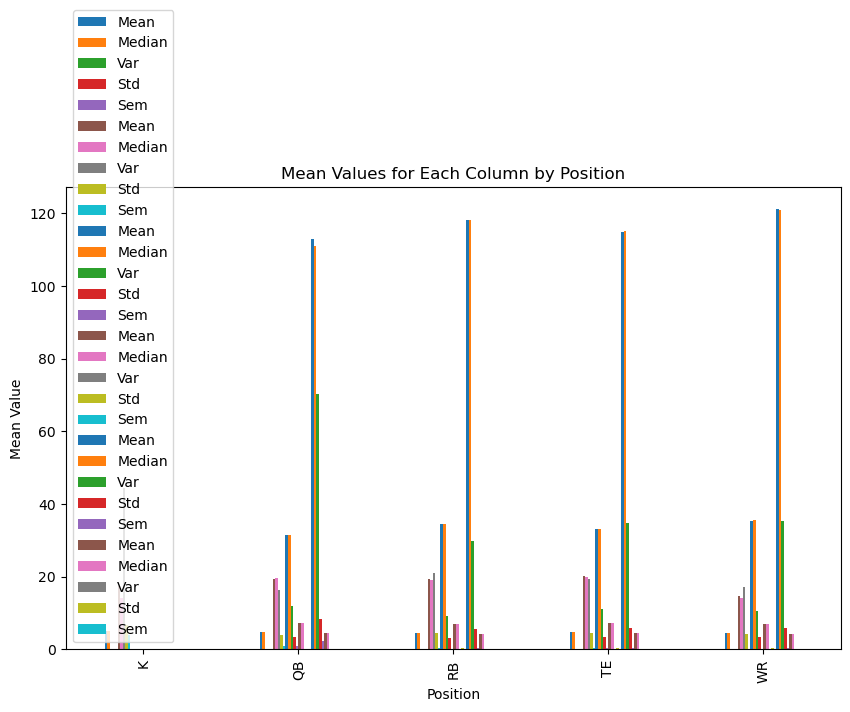

In [32]:
fig, ax = plt.subplots(figsize=(10, 6))
summary_data.plot(kind='bar', ax=ax)
ax.set_ylabel('Mean Value')
ax.set_xlabel('Position')
ax.set_title('Mean Values for Each Column by Position')
plt.show()

C:\Users\mjeow\AppData\Local\Temp\ipykernel_30208\432684402.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combine_pos_filtered[column] = combine_pos_filtered[column].replace(0.0, pd.NA)
C:\Users\mjeow\AppData\Local\Temp\ipykernel_30208\432684402.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combine_pos_filtered[column] = pd.to_numeric(combine_pos_filtered[column], errors='coerce')


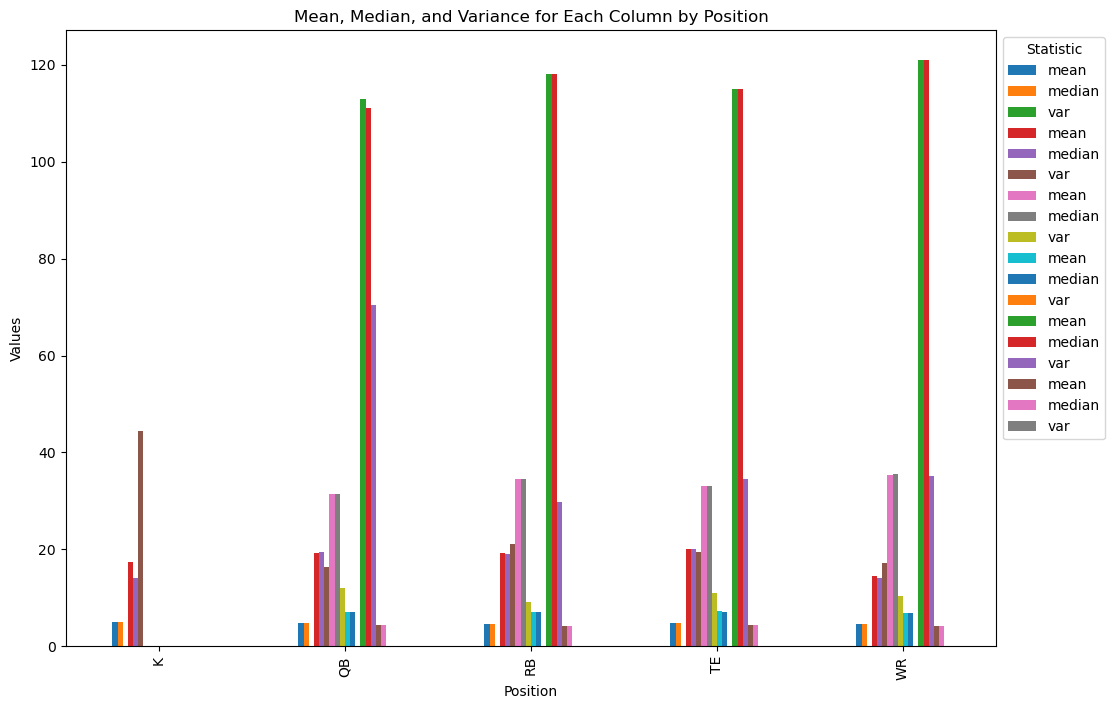

In [33]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your DataFrame is named combine_data
desired_positions = ['QB', 'WR', 'TE', 'RB', 'K']

# Filter specific positions
combine_pos_filtered = combine_data[combine_data['Pos'].isin(desired_positions)]

# Columns to analyze
columns_to_analyze = ['40yd', 'Bench', 'Vertical', '3Cone', 'Broad Jump', 'Shuttle']

# Create an empty DataFrame to store the results
summary_data = pd.DataFrame()

# Loop through each column and calculate statistics
for column in columns_to_analyze:
    # Replace 0.0 values with NaN
    combine_pos_filtered[column] = combine_pos_filtered[column].replace(0.0, pd.NA)
    
    # Convert the column to numeric (including handling NaN)
    combine_pos_filtered[column] = pd.to_numeric(combine_pos_filtered[column], errors='coerce')
    
    # Drop rows with NaN values in the column
    combine_pos_filtered = combine_pos_filtered.dropna(subset=[column])
    
    # Group by 'Pos' and calculate mean, median, and variance
    combine_pos_stats = combine_pos_filtered.groupby('Pos')[column].agg(['mean', 'median', 'var']).reset_index()
    
    # Append the statistics to the overall summary_data DataFrame
    summary_data = pd.concat([summary_data, combine_pos_stats.set_index('Pos')], axis=1)

# Plotting the bar chart
fig, ax = plt.subplots(figsize=(12, 8))
summary_data.plot(kind='bar', ax=ax)
ax.set_ylabel('Values')
ax.set_xlabel('Position')
ax.set_title('Mean, Median, and Variance for Each Column by Position')
plt.legend(title='Statistic', bbox_to_anchor=(1, 1))
plt.show()


In [34]:
summary_data

,mean,median,var,mean,median,var,mean,median,var,mean,median,var,mean,median,var,mean,median,var
Pos,,,,,,,,,,,,,,,,,,
K,4.910984,4.920,0.022479,17.333333,14.0,44.333333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
QB,4.822443,4.820,0.030396,19.300000,19.5,16.326316,31.464286,31.5,12.017857,7.151538,7.15,0.038664,113.000000,111.0,70.333333,4.358462,4.38,0.027714
RB,4.555108,4.560,0.011772,19.334711,19.0,21.051298,34.515982,34.5,9.030636,7.074161,7.07,0.043046,118.067742,118.0,29.778568,4.272651,4.25,0.023603
TE,4.769167,4.775,0.020625,20.160883,20.0,19.401250,33.083333,33.0,11.023699,7.185020,7.15,0.052432,114.909465,115.0,34.611604,4.363167,4.36,0.023170
WR,4.511437,4.510,0.010403,14.571138,14.0,17.092689,35.270330,35.5,10.411342,6.958485,6.95,0.043382,121.080780,121.0,35.175021,4.259435,4.26,0.021771


In [35]:
print(summary_data.columns)

Index(['mean', 'median', 'var', 'mean', 'median', 'var', 'mean', 'median',
       'var', 'mean', 'median', 'var', 'mean', 'median', 'var', 'mean',
       'median', 'var'],
      dtype='object')


In [36]:
mean_40yd = summary_data['40yd']

KeyError: '40yd'

In [ ]:
import scipy.stats as st

quartiles = summary_data[]